In [1]:
import numpy as np
import pandas as pd 
import sqlalchemy as sa
from sqlalchemy import create_engine

In [2]:
import matplotlib.pyplot as ply
import seaborn as sn
%matplotlib inline

In [3]:
Username= 'Admin'
Password= 'amazing_people'
Host='alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port='1433'
Database='Tamala'


In [4]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)


In [5]:
sql_query1= "Select* from claims_data"
sql_query2= "Select* from test_set"

In [6]:
df= pd.read_sql_query(sql_query1, connection)


In [13]:
df['age'] = pd.to_numeric(df['age'])
df['bmi'] = pd.to_numeric(df['bmi'])
df['steps'] = pd.to_numeric(df['steps'])
df['children'] = pd.to_numeric(df['children'])
df['claim_amount'] = pd.to_numeric(df['claim_amount'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                1338 non-null int64
sex                1338 non-null object
bmi                1338 non-null float64
steps              1338 non-null int64
children           1338 non-null int64
smoker             1338 non-null object
region             1338 non-null object
insurance_claim    1338 non-null object
claim_amount       1338 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


In [15]:
df2 = pd.read_sql_query(sql_query2, connection)

In [16]:
df2.head()

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.88,8049,0,no,southwest
1,2,20,female,26.265,7970,3,yes,southwest
2,3,32,female,26.025,2973,0,no,southwest
3,4,19,female,22.085,10427,1,yes,southwest
4,5,20,female,28.685,3972,0,yes,southwest


Logistic Regression(Claims Data)

In [27]:
#Lables
y= df['claim_amount']

#Features

X = df.drop(['insurance_claim','claim_amount','region','sex','smoker'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
age         1338 non-null int64
bmi         1338 non-null float64
steps       1338 non-null int64
children    1338 non-null int64
dtypes: float64(1), int64(3)
memory usage: 41.9 KB


In [28]:
X_transformed = pd.get_dummies(X, drop_first=True)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=47)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn = KNeighborsRegressor()

Training

In [34]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [37]:
pred_knn = knn.predict(X_test)

Predicting

In [36]:
pred_knn = knn.predict(X_test)

Testing

In [38]:
from sklearn.metrics import mean_squared_error

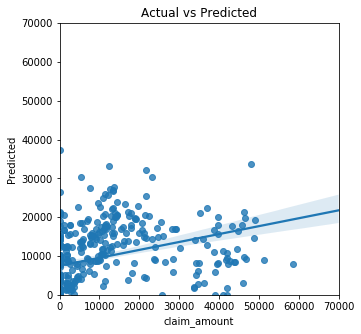

In [76]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_knn)

In [77]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)

RMSE: 13213.016715387408


Train

In [78]:
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_20 = KNeighborsRegressor(n_neighbors=20)

In [79]:
knn_3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [80]:
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [81]:
knn_20.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

Predict

In [82]:
pred_knn_3 = knn_3.predict(X_test)
pred_knn_5 = knn_5.predict(X_test)
pred_knn_20 = knn_20.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


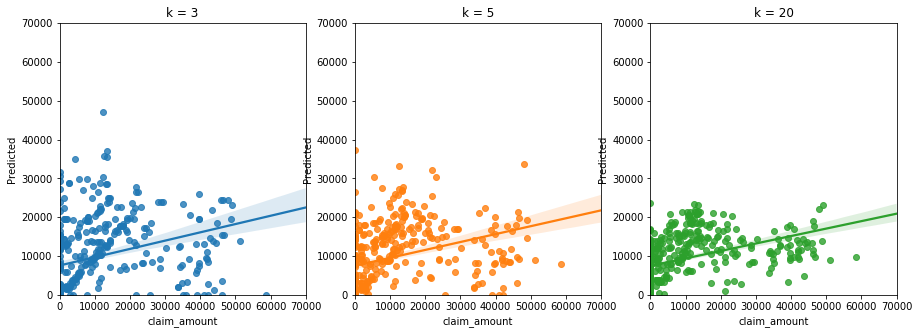

In [83]:

f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_knn_3, pred_knn_5, pred_knn_20]
title = ['k = 3', 'k = 5', 'k = 20']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [84]:
print('RMSE:')
print('k=3:', mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', mean_squared_error(y_test, pred_knn_20) ** 0.5)

RMSE:
k=3: 13879.775121109655
k=5: 13213.016715387408
k=20: 12373.763555884296


Decision Trees

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
tree = DecisionTreeRegressor(random_state=50)

In [87]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

Predicting

In [88]:
pred_tree = tree.predict(X_test)

Testing

In [89]:
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


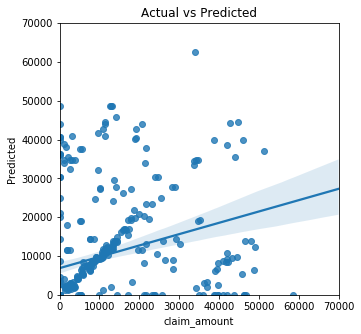

In [90]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_tree)

RMSE

In [91]:
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)

RMSE: 15918.254318203992


Train

In [92]:
# max_depth=2 and min_samples_leaf=5
tree_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=50)

# max_depth=5 and min_samples_leaf=4
tree_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=50)

# max_depth=10 and min_samples_leaf=3
tree_3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=50)

In [93]:
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [94]:
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [95]:
tree_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [96]:
pred_tree_1 = tree_1.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_3 = tree_3.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


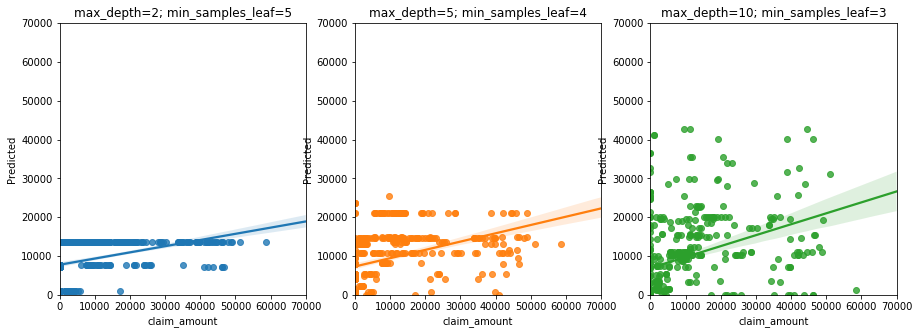

In [97]:
# Create figure and axes
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_tree_1, pred_tree_2, pred_tree_3]
title = ['max_depth=2; min_samples_leaf=5', 'max_depth=5; min_samples_leaf=4', 'max_depth=10; min_samples_leaf=3']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

In [98]:
print('RMSE:')
print('max_depth=2; min_samples_leaf=5:', mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5; min_samples_leaf=4:', mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10; min_samples_leaf=3:', mean_squared_error(y_test, pred_tree_3) ** 0.5)

RMSE:
max_depth=2; min_samples_leaf=5: 12348.177886005848
max_depth=5; min_samples_leaf=4: 12482.319987103678
max_depth=10; min_samples_leaf=3: 13695.274826021068


Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
forest = RandomForestRegressor(n_estimators=100, random_state=50)

In [101]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

Prediciting

In [104]:
pred_forest = forest.predict(X_test)

Testing

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


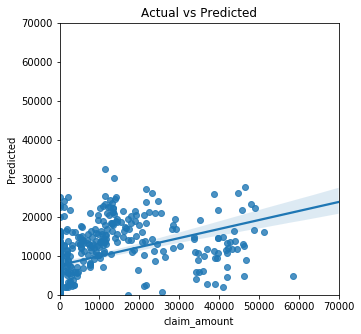

In [106]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_forest)

RMSE

In [107]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 12493.669300956904


Train

In [108]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

In [109]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

In [110]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

In [111]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

Predict

In [112]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

In [ ]:
Test

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


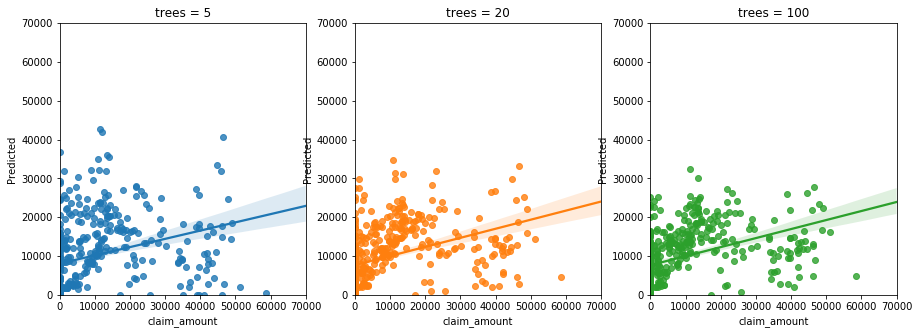

In [114]:
# Create figure and axes
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

In [ ]:
RMSE

In [115]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

RMSE:
trees=5: 14036.03832003775
trees=20: 12774.116249255885
trees=100: 12493.669300956904


Support Vector Machines

In [116]:
from sklearn.svm import SVR

In [117]:
svm = SVR(kernel='linear', C=500, gamma=50)

In [118]:
svm.fit(X_train, y_train)

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=50,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting

In [119]:
pred_svm = svm.predict(X_test)

Testing

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


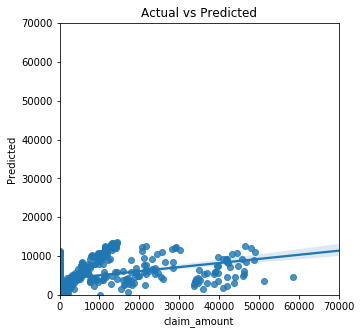

In [122]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_svm)

In [123]:
print('RMSE:', mean_squared_error(y_test, pred_svm) ** 0.5)

RMSE: 13667.478320971399


Train

In [125]:
# kernel=linear, C=100, gamma=20
svm_1 = SVR(kernel='linear', C=100, gamma=20)

# kernel=rbf, C=10, gamma=0.01
svm_2 = SVR(kernel='rbf', C=10, gamma=0.01)

# kernel=poly, C=20, gamma=1
svm_3 = SVR(kernel='poly', C=20, gamma=1)

In [126]:
svm_1.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=20,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
svm_2.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [134]:
svm_3.fit(X_train, y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predict

In [135]:
pred_svm_1 = svm_1.predict(X_test)
pred_svm_2 = svm_2.predict(X_test)
pred_svm_3 = svm_3.predict(X_test)

Test

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


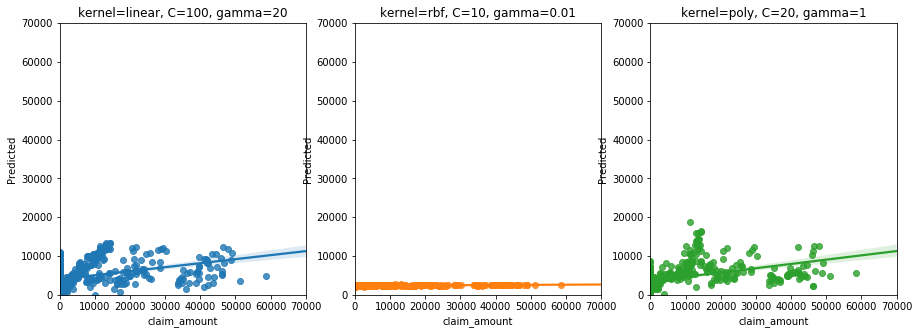

In [146]:
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_svm_1, pred_svm_2, pred_svm_3]
title = ['kernel=linear, C=100, gamma=20', 'kernel=rbf, C=10, gamma=0.01', 'kernel=poly, C=20, gamma=1']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [147]:
print('RMSE:')
print('kernel=linear, C=100, gamma=20:', mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', mean_squared_error(y_test, pred_svm_3) ** 0.5)

RMSE:
kernel=linear, C=100, gamma=20: 13659.186935909887
kernel=rbf, C=10, gamma=0.01: 15573.900350432441
kernel=poly, C=20, gamma=1: 13769.257988478235


Conclusion

The Model that has the highest RMSE IS the Random Forest


In [137]:
sql_query ='Select* from test_set'

In [138]:
df1=pd.read_sql_query(sql_query,connection)

In [139]:
df1.head(25)

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.88,8049,0,no,southwest
1,2,20,female,26.265,7970,3,yes,southwest
2,3,32,female,26.025,2973,0,no,southwest
3,4,19,female,22.085,10427,1,yes,southwest
4,5,20,female,28.685,3972,0,yes,southwest
5,6,24,female,23.8,8789,0,yes,southwest
6,7,58,male,35.245,3095,1,no,southeast
7,8,46,male,24.7,8729,1,no,northwest
8,9,42,female,26.08,8439,0,no,southwest
9,10,21,female,52.58,3636,0,no,southwest


In [140]:
rwid = df1.row_id.values

In [141]:
X = df1.drop(['region','row_id','sex','smoker'],axis=1)
X.head()

,age,bmi,steps,children
0,27,28.88,8049,0
1,20,26.265,7970,3
2,32,26.025,2973,0
3,19,22.085,10427,1
4,20,28.685,3972,0


In [142]:
 prd = tree.predict(X)

In [143]:
submission = pd.DataFrame({'row_id':rwid,'predictions':prd})

In [144]:
submission.head()

,row_id,predictions
0,1,0.0000
1,2,30942.1918
2,3,0.0000
3,4,30942.1918
4,5,0.0000


In [145]:
submission.to_csv('regression_model_prediction')